In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
scaler = joblib.load('/content/drive/MyDrive/ML Collab/Production/production_scaler.pkl')
print("Scaler loaded \n\n")

df = pd.read_csv('/content/drive/MyDrive/ML Collab/Production/production_dataset.csv')
# df = df.drop(columns=['Year'])
df = df.dropna()
df.head()

Scaler loaded 




,Unnamed: 0,Day,Month,Hour,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,0,1,1,0,0.055046,0.0,0.465602,0.00209,0.316456,0.965517,0.0
1,1,1,1,1,0.155963,0.0,0.461916,0.00209,0.308861,0.977011,0.0
2,2,1,1,2,0.055046,0.0,0.460688,0.00286,0.283544,0.988506,0.0
3,3,1,1,3,0.220183,0.0,0.459459,0.00231,0.281013,0.988506,0.0
4,4,1,1,4,0.366972,0.0,0.457002,0.00330,0.405063,0.620690,0.0


In [4]:
feature_columns = ['Day','Month', 'Hour', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity']
X = df[feature_columns]
y = df['SystemProduction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_model = SGDRegressor(random_state=42, warm_start=True)

param_grid = {
    'alpha': [0.0001],
    'eta0': [0.01],
    'penalty': ['elasticnet'],
    'max_iter': [1000],
    'tol': [1e-5],  # Stopping tolerance
    'power_t': [0.25],  # Learning rate schedule parameter
    'l1_ratio': [0.85]  # Only used for 'elasticnet' penalty
}



grid_search = GridSearchCV(sgd_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:", grid_search.best_params_)


Best Parameters from GridSearchCV: {'alpha': 0.0001, 'eta0': 0.01, 'l1_ratio': 0.85, 'max_iter': 1000, 'penalty': 'elasticnet', 'power_t': 0.25, 'tol': 1e-05}


In [5]:
batch_size = 2000
n_batches = len(X_train) // batch_size

for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    X_batch = X_train.iloc[start_idx:end_idx]
    y_batch = y_train.iloc[start_idx:end_idx]

    X_batch = X_batch[feature_columns]

    best_model.partial_fit(X_batch[feature_columns], y_batch) # ensure all features are used in training
    print(f"Batch {i+1}/{n_batches} fitted")


predictions = best_model.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R² Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

print()

Batch 1/3 fitted
Batch 2/3 fitted
Batch 3/3 fitted
R² Score: 0.6014548774208578
MSE: 0.01329562651319929
MAE: 0.062441296158946544



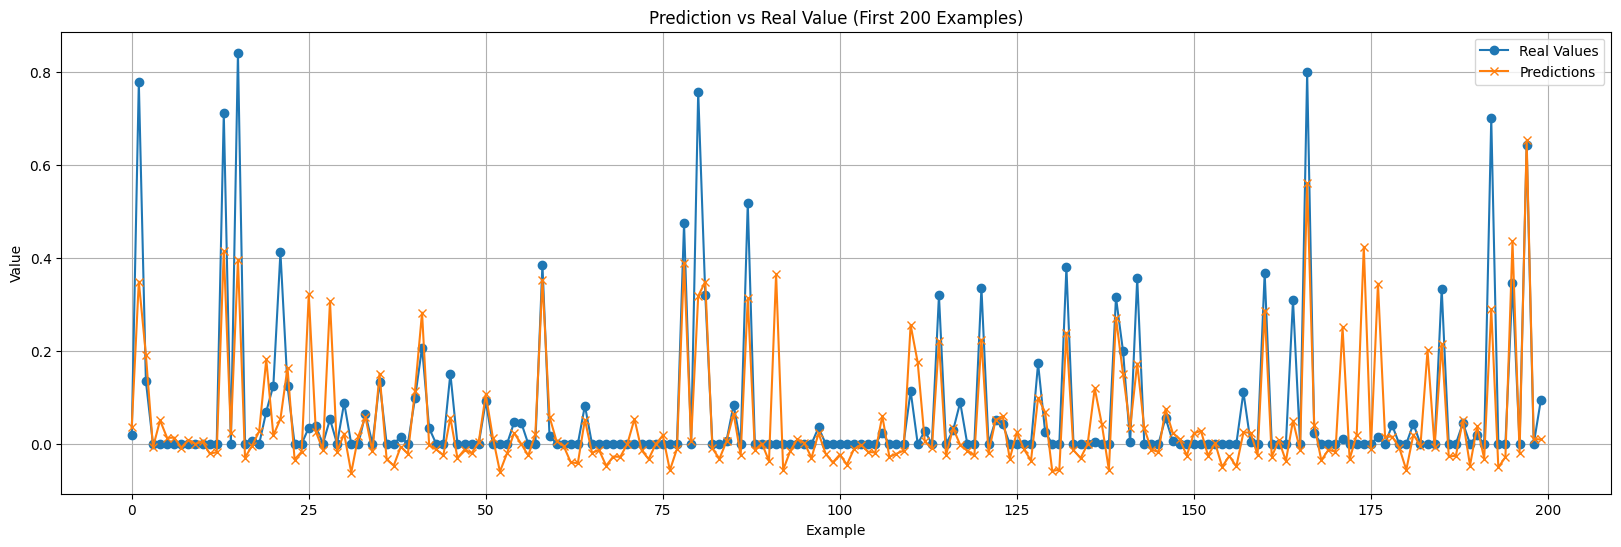

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(range(200), y_test[:200], label='Real Values', marker='o')
plt.plot(range(200), predictions[:200], label='Predictions', marker='x')
plt.xlabel('Example')
plt.ylabel('Value')
plt.title('Prediction vs Real Value (First 200 Examples)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
example = scaler.data_max_
print(example)

AttributeError: 'str' object has no attribute 'data_max_'

In [10]:
new = 'data' #Dataframe

scaler = 'import' #importing the scale
model = 'import' #importing the model

